In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import metrics

In [ ]:
#importing dataset
df = pd.read_csv("/content/drive/Shareddrives/my_workspace/task2_train_data.csv")
df.head()
print(df.shape)

(60000, 785)


In [ ]:
#label
y = df['y']

In [ ]:
#spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(df, y , test_size=0.2, random_state=40)

In [ ]:
#shape of train and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(48000, 785)
(12000, 785)
(48000,)
(12000,)


In [ ]:
#number of classes in this dataset
num_class = len(np.unique(y))
num_class

10

In [ ]:
#ome hot encoding fot the label For example, using a one-hot encoding for 10 classes, the integer 5 will be encoded as 0000010000.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
#converting to numpy array
X_train=np.array(X_train)
X_test=np.array(X_test)

In [ ]:
#normalization the array data
X_train=X_train/255.0
X_test=X_test/255.0

In [ ]:
#dimension of a single input
dimension = np.prod(X_train.shape[1:])
dimension


785

In [ ]:
#model creation
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimension,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_class, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               402432    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 670,218
Trainable params: 670,218
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#In this step, we configure the optimizer to be rmsprop. We also specify the loss type which is categorical cross entropy which is used for multiclass classification
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#model training
history = model.fit(X_train, y_train, batch_size=256, epochs=20, verbose=1,
                    validation_data=(X_test, y_test))


Epoch 1/20
188/188 [==============================] - 6s 29ms/step - loss: 0.3058 - accuracy: 0.9046 - val_loss: 0.1748 - val_accuracy: 0.9435
Epoch 2/20
188/188 [==============================] - 5s 27ms/step - loss: 0.1104 - accuracy: 0.9656 - val_loss: 0.0866 - val_accuracy: 0.9730
Epoch 3/20
188/188 [==============================] - 5s 27ms/step - loss: 0.0656 - accuracy: 0.9796 - val_loss: 0.1150 - val_accuracy: 0.9643
Epoch 4/20
188/188 [==============================] - 5s 26ms/step - loss: 0.0451 - accuracy: 0.9856 - val_loss: 0.0780 - val_accuracy: 0.9767
Epoch 5/20
188/188 [==============================] - 5s 27ms/step - loss: 0.0327 - accuracy: 0.9893 - val_loss: 0.0980 - val_accuracy: 0.9738
Epoch 6/20
188/188 [==============================] - 5s 26ms/step - loss: 0.0239 - accuracy: 0.9923 - val_loss: 0.0820 - val_accuracy: 0.9797
Epoch 7/20
188/188 [==============================] - 5s 26ms/step - loss: 0.0182 - accuracy: 0.9939 - val_loss: 0.0832 - val_accuracy: 0.9810

In [ ]:
#model performance evaluation
[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

375/375 [==============================] - 2s 4ms/step - loss: 0.1282 - accuracy: 0.9819
Evaluation result on Test Data : Loss = 0.128183975815773, accuracy = 0.9819166660308838


Text(0.5, 1.0, 'Accuracy Curves')

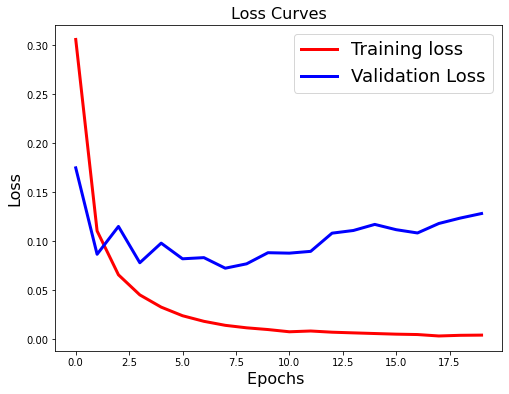

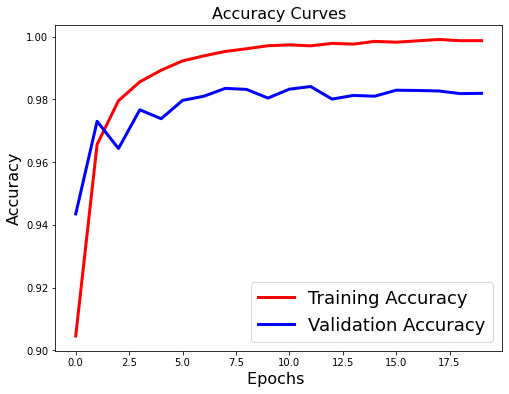

In [ ]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)